## Make stars on CCD edge ... 

In [2]:
import os
import argparse
import numpy as np
import matplotlib.pyplot as plt

In [1]:

from lsst.ts.wep.ParamReader import ParamReader
from lsst.ts.wep.Utility import FilterType

from lsst.ts.ofc.Utility import InstName
from lsst.ts.ofc.ctrlIntf.OFCCalculationFactory import OFCCalculationFactory

from lsst.ts.phosim.SkySim import SkySim
from lsst.ts.phosim.OpdMetrology import OpdMetrology
from lsst.ts.phosim.Utility import getAoclcOutputPath, getConfigDir


ModuleNotFoundError: No module named 'lsst'

In [3]:

# Survey parameters
surveySettingFilePath = os.path.join(getConfigDir(),
                                    "surveySettings.yaml")
surveySettings = ParamReader(filePath=surveySettingFilePath)
filterType = FilterType.fromString(
    surveySettings.getSetting("filterType"))
raInDeg = surveySettings.getSetting("raInDeg")
decInDeg = surveySettings.getSetting("decInDeg")
rotAngInDeg = surveySettings.getSetting("rotAngInDeg")

ofcCalc = OFCCalculationFactory.getCalculator(InstName.COMCAM)
ofcCalc.setFilter(filterType)
ofcCalc.setRotAng(rotAngInDeg)
ofcCalc.setGainByPSSN()
     
skySim = SkySim()
metr = OpdMetrology()
metr.setDefaultComcamGQ()

In [57]:
starId = 0
opdMetr = metr
raCenterDegList, declCenterDegList = opdMetr.getFieldXY()

# limit the list to however many fields we are simulating 
numFields = 7
raCenterDegList = raCenterDegList[:numFields]
declCenterDegList = declCenterDegList[:numFields]

# at this point, instead of adding any offset, select single ccd 
# and add few stars on the edge, with distance d from the edge

declCcdSpan = abs(declCenterDegList[1]-declCenterDegList[0])  # 0.2347 
raCcdSpan = abs(np.unique(raCenterDegList)[1] - np.unique(raCenterDegList)[0]) # 0.2347 



-0.35205
-0.11735
0.11735
-0.35205
-0.11735
0.11735
-0.35205


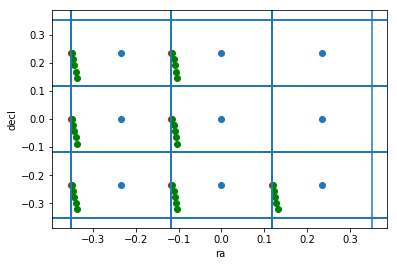

In [62]:
%matplotlib inline


plt.scatter(raInDegList,declInDegList)
plt.ylabel('decl')
plt.xlabel('ra')
for ra in raCenterDegList:
    plt.axvline(ra-raCcdSpan/2)
    plt.axvline(ra+raCcdSpan/2)
for dec in declCenterDegList:
    plt.axhline(dec-declCcdSpan/2)
    print(dec-declCcdSpan/2)
    plt.axhline(dec+declCcdSpan/2)
    
# This plots stars right on the left edge ...
raLeftEdgeList =raCenterDegList-raCcdSpan/2
for ra,dec in zip(raLeftEdgeList, declCenterDegList):
    plt.scatter(ra,dec,c='r')
    
    
#Add offset from the edge :
raNumPx = 4096
decNumPx = 4096 

raOffsetDeltaPx = 50
raMinOffsetPx = 50
numStars = 5

raOffsetPxList = np.arange(raMinOffsetPx,raMinOffsetPx+raOffsetDeltaPx*numStars,raOffsetDeltaPx)
raOffsetDegList = (raOffsetPxList / raNumPx) * raCcdSpan

decOffsetPx = 380
decOffsetDeg = (decOffsetPx / decNumPx) * declCcdSpan

numFields = 5 


raCatalog = []
decCatalog = []

count = 0
for raOffsetDeg in raOffsetDegList:
    for ra,dec in zip(raLeftEdgeList+raOffsetDeg, declCenterDegList-count*decOffsetDeg):
        plt.scatter(ra,dec,c='g')
        
        if ra< 0:
            ra += 360.0
        raCatalog.append(ra)
        decCatalog.append(dec)
    count += 1 

In [64]:
decCatalog

[-0.2347,
 0.0,
 0.2347,
 -0.2347,
 0.0,
 0.2347,
 -0.2347,
 -0.25647392578125,
 -0.021773925781249998,
 0.21292607421874998,
 -0.25647392578125,
 -0.021773925781249998,
 0.21292607421874998,
 -0.25647392578125,
 -0.2782478515625,
 -0.043547851562499997,
 0.1911521484375,
 -0.2782478515625,
 -0.043547851562499997,
 0.1911521484375,
 -0.2782478515625,
 -0.30002177734375,
 -0.06532177734375,
 0.16937822265625,
 -0.30002177734375,
 -0.06532177734375,
 0.16937822265625,
 -0.30002177734375,
 -0.321795703125,
 -0.08709570312499999,
 0.14760429687499999,
 -0.321795703125,
 -0.08709570312499999,
 0.14760429687499999,
 -0.321795703125]

In [75]:
import sys
sys.path.append('../analysis_scripts/')
import imp


## Plot postage stamps for the postISR images: 

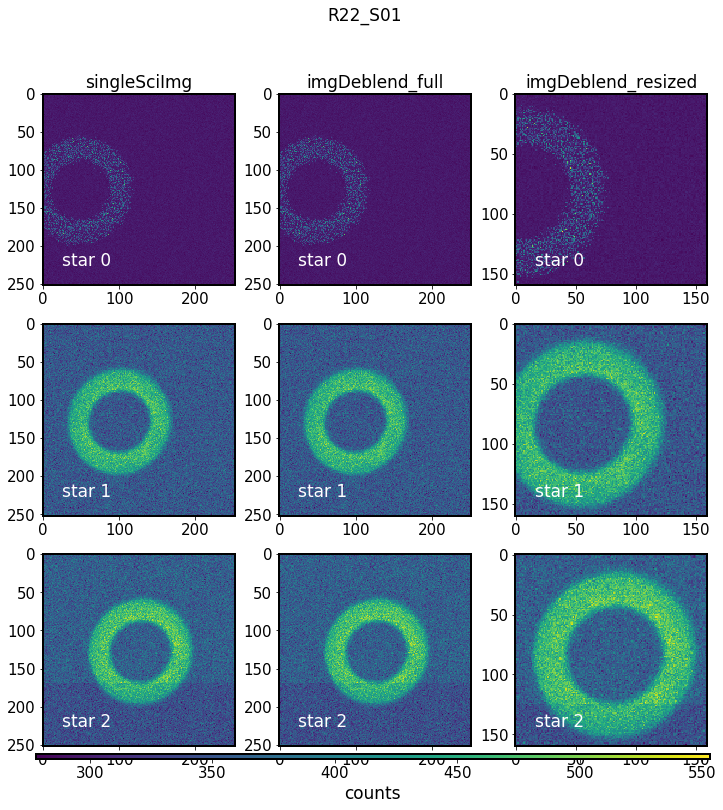

In [162]:
import numpy as np
import matplotlib.pyplot as plt 
import os

%matplotlib inline

accessDir = '/data/epyc/users/suberlak/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/'
topDir = 'results_edge'
expDir = 'edge' 

outputDir= os.path.join(accessDir,topDir,expDir)
baseOutputDir = outputDir
postageImgDir = os.path.join(baseOutputDir,'postage')
raft = 'R22' # the ComCam raft 
imgType = ['singleSciImg','imgDeblend_full', 'imgDeblend_resized']
chip = '01'
sensor = raft+'_S'+chip
focalType = 'intra'


# find the relevant postage stamp images
postage = os.listdir(postageImgDir)
sensorPostage = []
for txt in postage:
    if (txt.find(sensor) > -1) and (txt.find(focalType) > -1) : sensorPostage.append(txt)

# find out how many stars
Nstars = int(len(sensorPostage) / 3)
        
# initialize the plot 
fig,ax = plt.subplots(Nstars,len(imgType),figsize=(12,4*Nstars))


for col in range(len(imgType)): # columns : each imgType is one column 
    ax[0,col].set_title(imgType[col], fontsize=17)
    for row in range(Nstars): # Nstars   rows : one per star
        
        for txt in sensorPostage:
            if (txt.find(imgType[col]) > -1)  and (txt.find("_star-"+str(row)) > -1 ) :
                fname   = txt
        #fname = focalType+'_'+imgType[col]+"_sensor-"+sensor+"_star-"+str(row)+'.txt'
        image = np.loadtxt(postageImgDir+'/'+fname)
        if image.ndim == 2  :
            mappable = ax[row,col].imshow(image)
            ax[row,col].text(0.1,0.1,'star %d'%row , fontsize=17, color='white', transform=ax[row,col].transAxes)
        else:
            ax[row,col].remove()
            ax[row,col].text(0.2,0.5, 'image.ndim < 2 ',fontsize=15,
                            transform=ax[row,col].transAxes)
# that's for vertical cbar on the right 
#cbar_ax = fig.add_axes([0.93, 0.12, 0.02, 0.76])     #  (x0 ,y0  , dx,  dy )  
#cbar = fig.colorbar(mappable, cax = cbar_ax,  orientation='vertical')      

# that's for horizontal cbar on the bottom 
cbar_ax = fig.add_axes([0.12, 0.11, 0.78, 0.005])     #  (x0 ,y0  , dx,  dy )  
cbar = fig.colorbar(mappable, cax = cbar_ax,  orientation='horizontal')                    
cbar.set_label(label='counts',weight='normal', fontsize=17)

# calculate the separation in units of donut radii ... 
# amplifierSpanPx = 2048 # in pixels
# donutPxRadius = 66 # in pixels 
# sepInPx = starSep*0.01*amplifierSpanPx
# sepInRadii = sepInPx / donutPxRadius  # convert separation to units of donut radii 

#figtitle= 'Sep=%.2f '%sepInRadii+r'$R_{\mathrm{Donut}}$, '+ \
#r'$\Delta =%d$mag, ' % (16-mag)+sensor+' '+focalType+ '-focal, '+when
figtitle = sensor
fig.suptitle(figtitle, fontsize=17)
plt.savefig(topDir + '_'+expDir+'_'+sensor+'_postageImg.png', bbox_inches='tight', dpi=100)

In [156]:
# find the relevant postage stamp images
postage = os.listdir(postageImgDir)
sensorPostage = []
for txt in postage:
    if (txt.find(sensor) > -1) and (txt.find(focalType) > -1) : sensorPostage.append(txt)

        

3.0

In [99]:
txt = 'intra_singleSciImg_sensor-R22_S02_star-0_id-20.txt'
x = re.findall('^intra*', txt)

In [105]:
x = re.match('^extra*',txt)

In [114]:
import re 
  
def Filter(string, substr): 
    return [s for s in string  
    if re.match(r'[^\d]+|^', s).group(0) in substr] 
      
# Driver code 
string = postage
substr = ['extra'] 
print(Filter(string, substr)) 

[]


In [136]:
regex = re.compile('^intra')

## Plot postISR of CCD

Read the file with pixel positions of donuts associated with catalog stars... 

In [18]:

from astropy.table import Table
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.table import  hstack
from astropy.table import  vstack
from astropy.table import Column
from astropy.table import join


accessDir = '/data/epyc/users/suberlak/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/'
topDir = 'results_edge'
expDir = 'edge' 

outputDir= os.path.join(accessDir,topDir,expDir)
postageImgDir = os.path.join(outputDir,'postage')

donuts = Table.read(postageImgDir+'donutStarsExtraIntra.txt', format='ascii')

In [19]:
donuts

abbrevDetectorName,focalPlane,starId,xpos,ypos
str7,str5,int64,float64,float64
R22_S02,intra,20,121.898552,1252.577299
R22_S02,extra,20,121.898552,1252.577299
R22_S02,intra,29,124.293188,861.507095
R22_S02,extra,29,124.293188,861.507095
R22_S02,intra,38,145.622636,466.94608
R22_S02,extra,38,145.622636,466.94608
R22_S12,intra,23,122.029855,1251.440414
R22_S12,extra,23,122.029855,1251.440414
R22_S12,intra,32,124.19086,859.446941


In [12]:
import lsst.daf.persistence as dafPersist
import lsst.daf.base        as dafBase
import lsst.afw.table as afwTable
import numpy as np
import matplotlib.pyplot as plt 
import os


accessDir = '/data/epyc/users/suberlak/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/'
topDir = 'results_edge'
expDir = 'edge' 

outputDir= os.path.join(accessDir,topDir,expDir)

data_dir = outputDir
print('Reading data from \n')
print(data_dir)
repo_dir = os.path.join(data_dir, 'input/rerun/run1')
butler = dafPersist.Butler(repo_dir)

butler.getKeys('postISRCCD')




# show what keys are needed 
# by the `postISRCCD` data type.... 
# butler.getKeys('postISRCCD')
# yields {'visit': int,
# 'filter': str,
# 'raftName': str,
# 'detectorName': str,
# 'detector': int}
obsId = 9006001 # intra 
detectors = ['S00', 'S01', 'S02','S10', 'S11', 'S12', 'S20', 'S21', 'S22']
raft = 'R22'
detector = 'S00'

sensor = raft+'_S'+detector 

detNumDict = {'S00':90, 'S01':91, 'S02':92, 'S10':93, 'S11':94, 'S12':95, 'S20':96, 'S21':97, 'S22':98}
detNum = detNumDict[detector]

data_id = {'visit': obsId, 'filter': 'g', 'raftName': raft, 'detectorName': detector, 'detector': detNum}
post = butler.get('postISRCCD', **data_id)  # doesn't show anything ...  ? 

Reading data from 

/data/epyc/users/suberlak/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/results_edge/edge


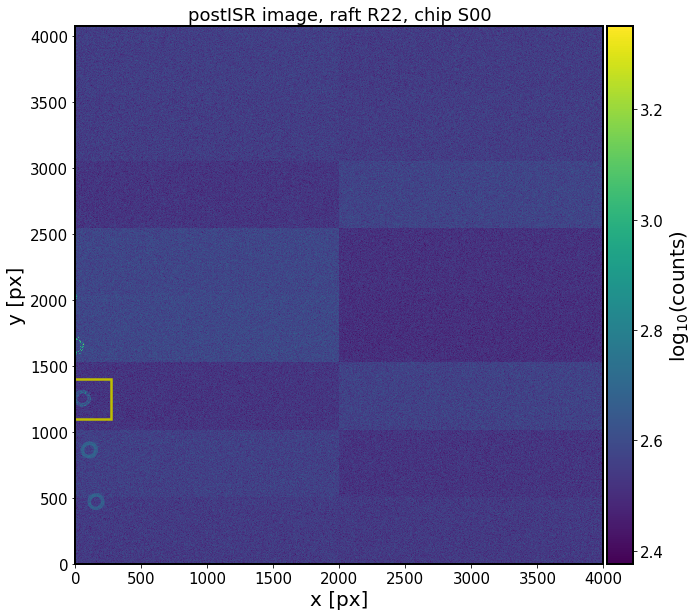

In [13]:
%matplotlib inline

# helper funtion for the colorbar 
# from https://joseph-long.com/writing/colorbars/
def colorbar(mappable):
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    import matplotlib.pyplot as plt
    last_axes = plt.gca()
    fig = ax.figure
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = fig.colorbar(mappable, cax=cax)
    plt.sca(last_axes)
    return cbar
# Plot image array
import matplotlib.cm as cm 

from matplotlib import rcParams 
rcParams['ytick.labelsize'] = 15
rcParams['xtick.labelsize'] = 15
rcParams['axes.labelsize'] = 20
rcParams['axes.linewidth'] = 2
rcParams['font.size'] = 15
rcParams['axes.titlesize'] = 18


fig,ax = plt.subplots(1,1,figsize=(10,10))

img = ax.imshow(np.log10(post.image.array.T),cmap=cm.get_cmap('viridis'),
          origin='lower')
cbar= colorbar(mappable=img)
cbar.set_label(label=r'$\log_{10}(\mathrm{counts})$', weight='normal', )
ax.set_xlabel('x [px]')
ax.set_ylabel('y [px]')
ax.set_title('postISR image, raft %s, chip %s'%(raft,detector))
ax.plot(122,1249, 's', markersize=40, markerfacecolor='none',
         markeredgewidth=2.5, markeredgecolor='y')
plt.savefig(topDir+'_'+expDir+'_'+sensor+'_postISR.png', bbox_inches='tight', dpi=100)


In [11]:
topDir = '../analysis_scripts/results_edge'
skyFilePath = os.path.join(topDir,'starEdge.txt')
os.path.exists(skyFilePath)

False

In [10]:
skyFilePath

'../analysis_scripts/results_edge/starCatEdge.txt'

In [ ]:
skyFilePath